## Quantum Image Processing 

Quantum Image Processing (QIP): Leveraging quantum computing to process and analyze images offers new possibilities for speed and efficiency. 

Quantum Image Processing is an emerging field with potential applications in quantum machine learning, pattern recognition, and image analysis. Understanding how to represent and manipulate images as quantum states is a crucial step toward leveraging quantum computers for complex image processing tasks.

In the below implementation, we explore how to represent a simple grayscale image as a quantum state using Qiskit. We ensure the image vector is properly normalized and visualize the quantum circuit.

The code represents the image data as a statevector. A statevector in a quantum system with n qubits is a complex number vector of size 2^n, where each element corresponds to the probability amplitude of being in a specific computational basis state.

In this code, the image is a 2x2 grayscale image. To represent it on a quantum circuit with 2 qubits, the code flattens the image into a 4-dimensional vector. Each element in this vector corresponds to the normalized intensity value (0 to 1) of a pixel. The statevector is then constructed by combining these intensity values with appropriate basis states.

The initialize instruction in the code applies a specific unitary operation to the qubits, setting their initial state to the statevector representing the image. The exact form of this operation depends on the chosen basis representation but ultimately transforms the computational basis states (|00>, |01>, |10>, |11>) into a superposition weighted by the image data.

While the code in this example doesn't explicitly apply any quantum gates that manipulate the statevector, it's important to understand that subsequent quantum circuit operations would involve applying unitary matrices that transform the statevector according to the Schrödinger equation: i * d |ψ(t)> / dt = H(t) |ψ(t)>

The statevector:

$$i \dfrac{d}{dt} |\psi(t)> = H(t) |\psi(t)>$$

Here, 
* $i$ is the imaginary unit
* $|\psi(t)>$ is the statevector at time $t$
* $H(t)$ is the Hamiltonian, a Hermitian matrix representing the system's total energy.




In [1]:
# Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define a simple 2x2 grayscale image
image = np.array([[0, 255], [255, 0]])

In [3]:
# Normalize pixel values to [0, 1]
image_normalized = image / 255.0

In [4]:
# Flatten the image to create a vector
image_vector = image_normalized.flatten()

In [5]:
# Ensure the sum of the amplitudes-squared is 1 by normalizing the vector
norm = np.linalg.norm(image_vector)
image_vector = image_vector / norm

In [6]:
# Create a quantum circuit with two qubits (since 2x2 = 4 pixels)
qc = QuantumCircuit(2)

In [7]:
# Initialize the quantum state to represent the image vector
qc.initialize(image_vector, [0, 1])

In [8]:
# Add statevector save instruction
qc.save_statevector()

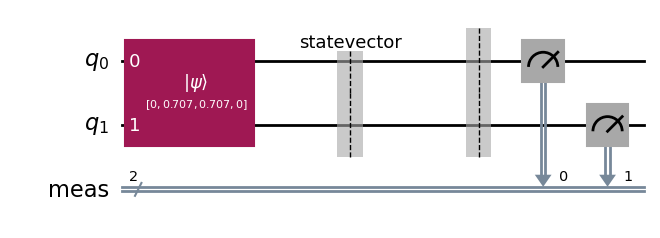

In [17]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [10]:
# Transpile the circuit for the AerSimulator
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)

In [11]:
# Run the simulation to get the statevector
result = simulator.run(transpiled_circuit).result()

In [12]:
# Get the statevector from experiment data (modified)
statevector = result.data()['statevector']

In [13]:
# Visualize the statevector using latex (Qiskit 1.0)
print(array_to_latex(statevector))  # Print the latex representation

<IPython.core.display.Latex object>


In [14]:
# Measure all qubits
qc.measure_all()

In [15]:
# Transpile the circuit with measurement for the AerSimulator
transpiled_circuit_with_measurement = transpile(qc, simulator)
result_with_measurement = simulator.run(transpiled_circuit_with_measurement, shots=1024).result()

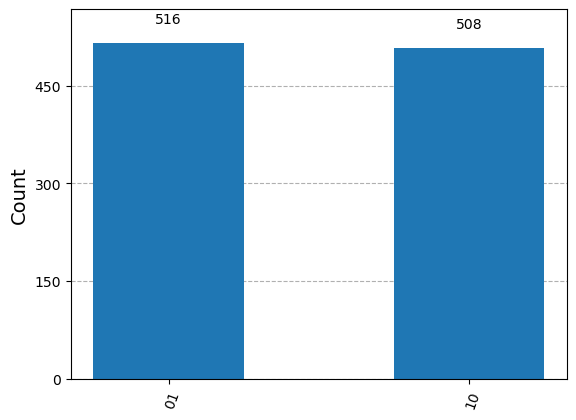

In [16]:
# Get the measurement results
counts = result_with_measurement.get_counts()
plot_histogram(counts)
plt.show()